In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.io import wavfile

import os

import numpy as np

import librosa

import librosa.display

from peakdetect import peakdetect

import pandas as pd

Read all .wav files

In [2]:
#read all category A files
os.chdir('C:\\Users\\liuyi\\OneDrive\\Documents\\Statistical Learning theory\\Assignment2\\categoryA')
srA1, dataA1 = wavfile.read("background full (FREE DOWNLOAD)-1213771396.wav")
srA2, dataA2 = wavfile.read("background music (FREE DOWNLOAD)-1219856890.wav")
srA3, dataA3 = wavfile.read("DeeYanKey-Andante.wav")
srA4, dataA4 = wavfile.read("hd audio background (FREE DOWNLOAD)-1213766218.wav")
srA5, dataA5 = wavfile.read("play background (FREE DOWNLOAD)-1219852972.wav")
srA6, dataA6 = wavfile.read("your background (FREE DOWNLOAD)-1219830094.wav")


In [3]:
#read all category B files
os.chdir('C:\\Users\\liuyi\\OneDrive\\Documents\\Statistical Learning theory\\Assignment2\\categoryB')
srB1, dataB1 = wavfile.read("Clear Water - by Oleg Mazur (Instrumental Music)-1225014439.wav")
srB2, dataB2 = wavfile.read("Relax - Calm Background Music (by Oleg Mazur)-600338028.wav")
srB3, dataB3 = wavfile.read("Rise And Shine - No Copyright Music (by Oleg Mazur)-1068033331.wav")
srB4, dataB4 = wavfile.read("Ron Gelinas - Casual [ROYALTY FREE MUSIC]-1147387510.wav")
srB5, dataB5 = wavfile.read("Ron Gelinas - Drops [ROYALTY FREE MUSIC]-877415785.wav")
srB6, dataB6 = wavfile.read("winter-forest.wav")



In [19]:
#read all category U files
os.chdir('C:\\Users\\liuyi\\OneDrive\\Documents\\Statistical Learning theory\\Assignment2\\categoryU')
srU1, dataU1 = wavfile.read("Synth-wave-with-metal-guitar.wav")
srU2, dataU2 = wavfile.read("The Fairy's Kiss _FREE DOWNLOAD-111190096.wav")

1. Display the Periodgram of spectragram of one file from category A, one file from category B and two files from category U
    1) Periodogram

In [4]:
#Obtain the FFT and frequencies for A1, B1, U1 and U2
#A1
dataA1 = dataA1/2.0**15
A1_signal = dataA1[:,0]
A1_fft = np.fft.rfft(A1_signal)
A1_freq = np.fft.rfftfreq(A1_signal.size, d=1/srA1)
A1_fft_abs = np.abs(A1_fft)
#B1
dataB1 = dataB1/2.0**15
B1_signal = dataB1[:,0]
B1_fft = np.fft.rfft(B1_signal)
B1_freq = np.fft.rfftfreq(B1_signal.size, d=1/srB1)
B1_fft_abs = np.abs(B1_fft)


In [20]:
#U1
dataU1 = dataU1/2.0**15
U1_signal = dataU1
U1_fft = np.fft.rfft(U1_signal)
U1_freq = np.fft.rfftfreq(U1_signal.size, d=1/srU1)
U1_fft_abs = np.abs(U1_fft)
#U2
dataU2 = dataU2/2.0**15
U2_signal = dataU2[:,0]
U2_fft = np.fft.rfft(U2_signal)
U2_freq = np.fft.rfftfreq(U2_signal.size, d=1/srU2)
U2_fft_abs = np.abs(U2_fft)

Plot the periodogram

Text(0.5, 1, 'Periodgram for A1, B1, U1 and U2')

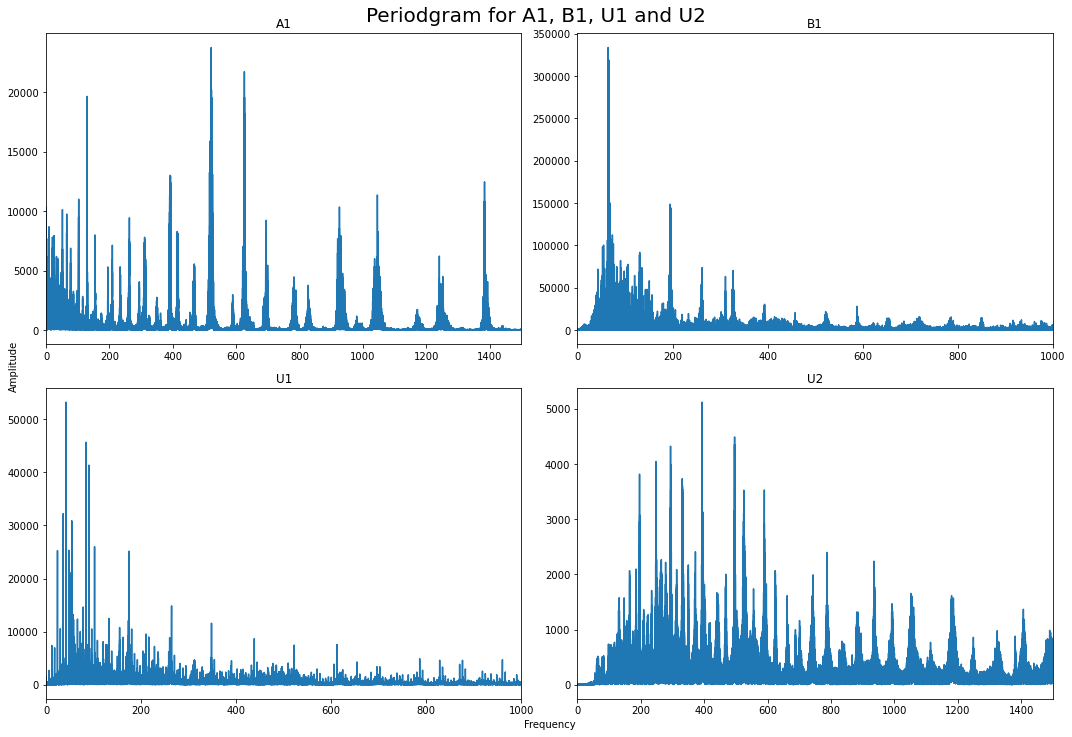

In [44]:
f1, ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].plot(A1_freq, A1_fft_abs)
ax[0,0].set_title("A1")
ax[0,0].set_xlim([0,1500])
ax[0,1].plot(B1_freq, B1_fft_abs)
ax[0,1].set_title("B1")
ax[0,1].set_xlim([0,1000])
ax[1,0].plot(U1_freq, U1_fft_abs)
ax[1,0].set_title("U1")
ax[1,0].set_xlim([0,1000])
ax[1,1].plot(U2_freq, U2_fft_abs)
ax[1,1].set_title("U2")
ax[1,1].set_xlim([0,1500])
f1.tight_layout()
f1.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
f1.suptitle('Periodgram for A1, B1, U1 and U2', y=1, fontsize=20)

    2) Spectrogram

In [12]:
A1 = librosa.stft(A1_signal)
A1db = librosa.amplitude_to_db(abs(A1))
B1 = librosa.stft(B1_signal)
B1db = librosa.amplitude_to_db(abs(B1))
U1 = librosa.stft(U1_signal)
U1db = librosa.amplitude_to_db(abs(U1))
U2 = librosa.stft(U2_signal)
U2db = librosa.amplitude_to_db(abs(U2))

Text(0.5, 1, 'Spectradgram for A1, B1, U1 and U2')

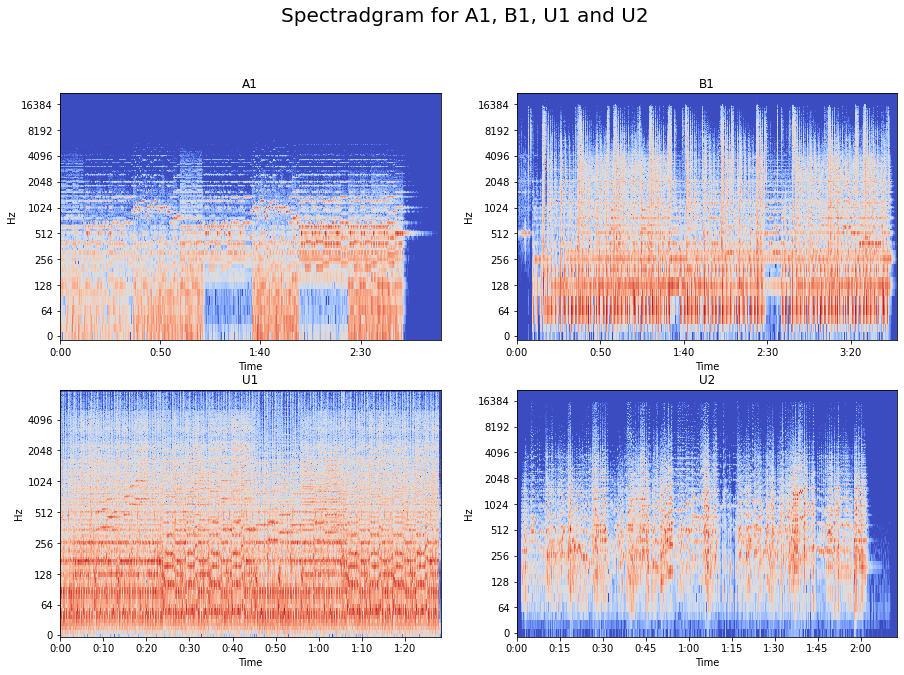

In [14]:
f2, ax2 = plt.subplots(2,2,figsize=(15,10))
librosa.display.specshow(A1db, sr=srA1, ax=ax2[0,0], x_axis='time', y_axis='log')
librosa.display.specshow(B1db, sr=srB1, ax=ax2[0,1], x_axis='time', y_axis='log')
librosa.display.specshow(U1db, sr=srU1, ax=ax2[1,0], x_axis='time', y_axis='log')
librosa.display.specshow(U2db, sr=srU2, ax=ax2[1,1], x_axis='time', y_axis='log')
ax2[0,0].set_title("A1")
ax2[0,1].set_title("B1")
ax2[1,0].set_title("U1")
ax2[1,1].set_title("U2")
f2.suptitle('Spectradgram for A1, B1, U1 and U2', y=1, fontsize=20)

2. Use KNN on periodogram data to find the labels of file 'U' and explore different values of 'K' to see how the performance changes.

Use A1, B1, U1, U2 as example to find peak frequencies in each category by interval observed from the spectrogram. U2's peaks are very close together with amplitude very similar to one another, therefore can't use big delta parameter, just filter through the peaks detected to get the highest peaks. 

In [5]:
peaksA1 = peakdetect(A1_fft_abs, A1_freq, lookahead=1000, delta=10000)[0]
peaksA1 = pd.DataFrame(peaksA1)
peaksA1.columns = ['Freq', 'Amp']
peaksB1 = peakdetect(B1_fft_abs, B1_freq, lookahead=1500, delta=50000)[0]
peaksB1 = pd.DataFrame(peaksB1)
peaksB1.columns = ['Freq', 'Amp']

In [21]:
peaksU1 = peakdetect(U1_fft_abs, U1_freq, lookahead=1000, delta=10000)[0]
peaksU1 = pd.DataFrame(peaksU1)
peaksU1.columns = ['Freq', 'Amp']
peaksU2 = peakdetect(U2_fft_abs, U2_freq, lookahead=1000, delta=1)[0]
peaksU2 = pd.DataFrame(peaksU2)
peaksU2.columns = ['Freq', 'Amp']
peaksU2 = peaksU2[peaksU2['Amp']>2500]

In [16]:
os.chdir('C:\\Users\\liuyi\\OneDrive\\Documents\\Statistical Learning theory\\Assignment2')
peaksU1.to_csv("U1 peaks.csv", index=False)
peaksU2.to_csv("U2 peaks.csv", index=False)

Plot the peaks on the periodogram

Text(0.5, 1.1, 'Periodgram for A1, B1, U1 and U2 with detected peaks')

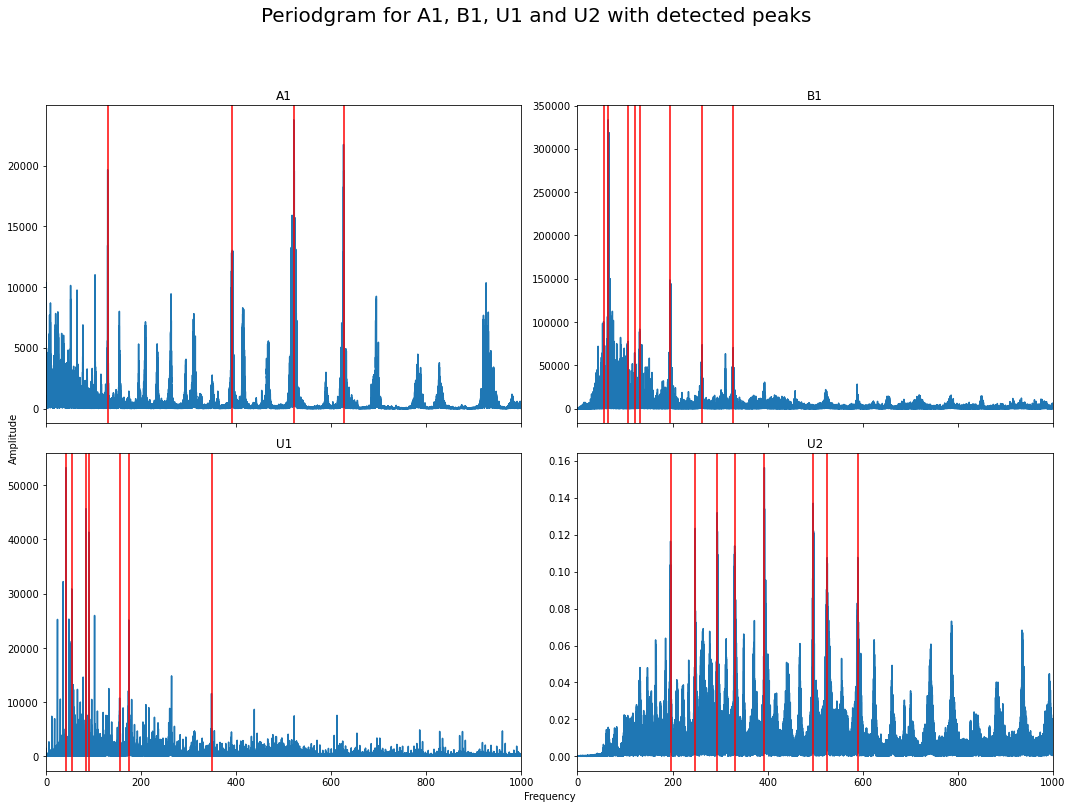

In [48]:
f1, ax = plt.subplots(2,2,figsize=(15,10),sharex=True)
ax[0,0].plot(A1_freq, A1_fft_abs)
ax[0,0].set_title("A1")
ax[0,0].set_xlim([0,1000])
for i in range(len(peaksA1.iloc[:,0])):
    ax[0,0].axvline(x=peaksA1.iloc[i,0], color="red")
ax[0,1].plot(B1_freq, B1_fft_abs)
ax[0,1].set_title("B1")
for i in range(len(peaksB1.iloc[:,0])):
    ax[0,1].axvline(x=peaksB1.iloc[i,0], color="red")
ax[1,0].plot(U1_freq, U1_fft_abs)
ax[1,0].set_title("U1")
for i in range(len(peaksU1.iloc[:,0])):
    ax[1,0].axvline(x=peaksU1.iloc[i,0], color="red")
ax[1,1].plot(U2_freq, U2_fft_abs)
ax[1,1].set_title("U2")
for i in range(len(peaksU2.iloc[:,0])):
    ax[1,1].axvline(x=peaksU2.iloc[i,0], color="red")
f1.tight_layout()
f1.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
f1.suptitle('Periodgram for A1, B1, U1 and U2 with detected peaks', y=1.1, fontsize=20)

Calculate periodogram data for all data

In [6]:
#Category A
dataA2 = dataA2/2.0**15
A2_signal = dataA2[:,0]
A2_fft = np.fft.rfft(A2_signal)
A2_freq = np.fft.rfftfreq(A2_signal.size, d=1/srA2)
A2_fft_abs = np.abs(A2_fft)
dataA3 = dataA3/2.0**15
A3_signal = dataA3
A3_fft = np.fft.rfft(A3_signal)
A3_freq = np.fft.rfftfreq(A3_signal.size, d=1/srA3)
A3_fft_abs = np.abs(A3_fft)
dataA4 = dataA4/2.0**15
A4_signal = dataA4[:,0]
A4_fft = np.fft.rfft(A4_signal)
A4_freq = np.fft.rfftfreq(A4_signal.size, d=1/srA4)
A4_fft_abs = np.abs(A4_fft)
dataA5 = dataA5/2.0**15
A5_signal = dataA5[:,0]
A5_fft = np.fft.rfft(A5_signal)
A5_freq = np.fft.rfftfreq(A5_signal.size, d=1/srA5)
A5_fft_abs = np.abs(A5_fft)
dataA6 = dataA6/2.0**15
A6_signal = dataA6[:,0]
A6_fft = np.fft.rfft(A6_signal)
A6_freq = np.fft.rfftfreq(A6_signal.size, d=1/srA6)
A6_fft_abs = np.abs(A6_fft)
#category B
dataB2 = dataB2/2.0**15
B2_signal = dataB2[:,0]
B2_fft = np.fft.rfft(B2_signal)
B2_freq = np.fft.rfftfreq(B2_signal.size, d=1/srB2)
B2_fft_abs = np.abs(B2_fft)
dataB3 = dataB3/2.0**15
B3_signal = dataB3[:,0]
B3_fft = np.fft.rfft(B3_signal)
B3_freq = np.fft.rfftfreq(B3_signal.size, d=1/srB3)
B3_fft_abs = np.abs(B3_fft)
dataB4 = dataB4/2.0**15
B4_signal = dataB4[:,0]
B4_fft = np.fft.rfft(B4_signal)
B4_freq = np.fft.rfftfreq(B4_signal.size, d=1/srB4)
B4_fft_abs = np.abs(B4_fft)
dataB5 = dataB5/2.0**15
B5_signal = dataB5[:,0]
B5_fft = np.fft.rfft(B5_signal)
B5_freq = np.fft.rfftfreq(B5_signal.size, d=1/srB5)
B5_fft_abs = np.abs(B5_fft)
dataB6 = dataB6/2.0**15
B6_signal = dataB6
B6_fft = np.fft.rfft(B6_signal)
B6_freq = np.fft.rfftfreq(B6_signal.size, d=1/srB6)
B6_fft_abs = np.abs(B6_fft)

Text(0.5, 1.1, 'Periodgram for the rest of the files')

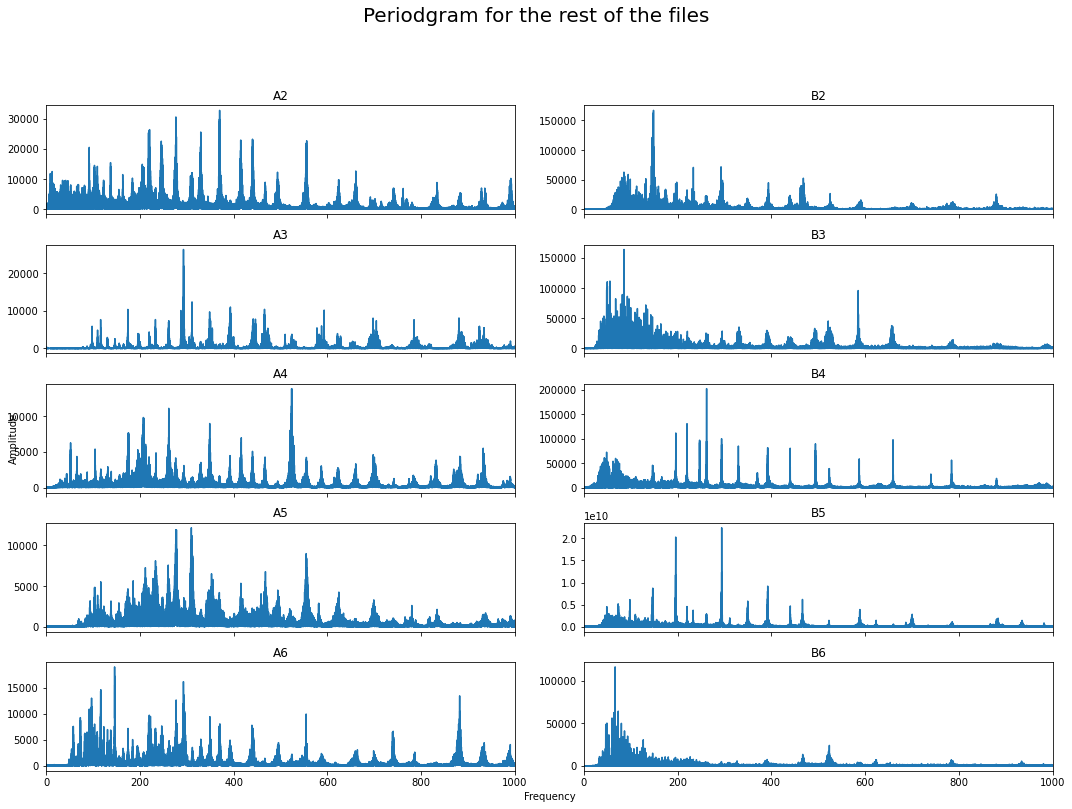

In [5]:
f1, ax = plt.subplots(5,2,figsize=(15,10),sharex=True)
ax[0,0].plot(A2_freq, A2_fft_abs)
ax[0,0].set_title("A2")
ax[0,0].set_xlim([0,1000])
ax[0,1].plot(B2_freq, B2_fft_abs)
ax[0,1].set_title("B2")
ax[1,0].plot(A3_freq, A3_fft_abs)
ax[1,0].set_title("A3")
ax[1,1].plot(B3_freq, B3_fft_abs)
ax[1,1].set_title("B3")
ax[2,0].plot(A4_freq, A4_fft_abs)
ax[2,0].set_title("A4")
ax[2,1].plot(B4_freq, B4_fft_abs)
ax[2,1].set_title("B4")
ax[3,0].plot(A5_freq, A5_fft_abs)
ax[3,0].set_title("A5")
ax[3,1].plot(B5_freq, B5_fft_abs)
ax[3,1].set_title("B5")
ax[4,0].plot(A6_freq, A6_fft_abs)
ax[4,0].set_title("A6")
ax[4,1].plot(B6_freq, B6_fft_abs)
ax[4,1].set_title("B6")
f1.tight_layout()
f1.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
f1.suptitle('Periodgram for the rest of the files', y=1.1, fontsize=20)

In [7]:
#Get peaks from all files
peaksA1['label'] = 'A'
peaksA2 = peakdetect(A2_fft_abs, A2_freq, lookahead=1000, delta=10000)[0]
peaksA2 = pd.DataFrame(peaksA2)
peaksA2.columns = ['Freq', 'Amp']
peaksA2['label'] = 'A'
peaksA3 = peakdetect(A3_fft_abs, A3_freq, lookahead=1000, delta=10000)[0]
peaksA3 = pd.DataFrame(peaksA3)
peaksA3.columns = ['Freq', 'Amp']
peaksA3['label'] = 'A'
peaksA4 = peakdetect(A4_fft_abs, A4_freq, lookahead=1000, delta=5000)[0]
peaksA4 = pd.DataFrame(peaksA4)
peaksA4.columns = ['Freq', 'Amp']
peaksA4['label'] = 'A'
peaksA5 = peakdetect(A5_fft_abs, A5_freq, lookahead=1000, delta=5000)[0]
peaksA5 = pd.DataFrame(peaksA5)
peaksA5.columns = ['Freq', 'Amp']
peaksA5['label'] = 'A'
peaksA6 = peakdetect(A6_fft_abs, A6_freq, lookahead=1000, delta=5000)[0]
peaksA6 = pd.DataFrame(peaksA6)
peaksA6.columns = ['Freq', 'Amp']
peaksA6['label'] = 'A'



In [27]:
peaksA1

,Freq,Amp,label
0,129.614678,19668.123292,A
1,392.019237,13029.957390,A
2,521.133676,23783.776444,A
3,625.736380,21751.063132,A
4,1045.405695,11367.720797,A
5,1383.488587,12476.364375,A


In [10]:
peaksB1['label'] = 'B'
peaksB2 = peakdetect(B1_fft_abs, B1_freq, lookahead=1500, delta=50000)[0]
peaksB2 = pd.DataFrame(peaksB2)
peaksB2.columns = ['Freq', 'Amp']
peaksB2['label'] = 'B'
peaksB3 = peakdetect(B3_fft_abs, B3_freq, lookahead=1500, delta=50000)[0]
peaksB3 = pd.DataFrame(peaksB3)
peaksB3.columns = ['Freq', 'Amp']
peaksB3['label'] = 'B'
peaksB4 = peakdetect(B4_fft_abs, B4_freq, lookahead=1500, delta=50000)[0]
peaksB4 = pd.DataFrame(peaksB4)
peaksB4.columns = ['Freq', 'Amp']
peaksB4['label'] = 'B'
peaksB5 = peakdetect(B5_fft_abs, B5_freq, lookahead=1500, delta=50000)[0]
peaksB5 = pd.DataFrame(peaksB5)
peaksB5.columns = ['Freq', 'Amp']
peaksB5['label'] = 'B'
peaksB6 = peakdetect(B6_fft_abs, B6_freq, lookahead=1500, delta=30000)[0]
peaksB6 = pd.DataFrame(peaksB6)
peaksB6.columns = ['Freq', 'Amp']
peaksB6['label'] = 'B'

In [13]:
#concatenate the peak dataframes
Apeaks = pd.concat([peaksA1, peaksA2, peaksA3, peaksA4, peaksA5, peaksA6], ignore_index=True, axis=0)
Bpeaks = pd.concat([peaksB1, peaksB2, peaksB3, peaksB4, peaksB5, peaksB6], ignore_index=True, axis=0)
Peaks = pd.concat([Apeaks, Bpeaks], ignore_index=True, axis=0)

In [74]:
Peaks

,Freq,Amp,label
0,129.614678,19668.123292,A
1,392.019237,13029.957390,A
2,521.133676,23783.776444,A
3,625.736380,21751.063132,A
4,1045.405695,11367.720797,A
...,...,...,...
1539,49.167379,50100.683438,B
1540,66.667049,115953.961396,B
1541,73.334137,64125.193159,B
1542,86.668311,40944.538453,B


In [15]:
Peaks.to_csv("A B peaks.csv", index=False)
Apeaks.to_csv("A peaks.csv", index=False)
Bpeaks.to_csv("B peaks.csv", index=False)

Train a KNN model 

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
A_x = Apeaks.drop(columns=['label'])
A_y = Apeaks['label']
B_x = Bpeaks.drop(columns=['label'])
B_y = Bpeaks['label']

Normalize the X for both category A, B and U peaks since the peaks vary significantly scale wise.

In [35]:
from sklearn.preprocessing import StandardScaler
A_x = StandardScaler().fit_transform(A_x)
B_x = StandardScaler().fit_transform(B_x)
peaksU1 = StandardScaler().fit_transform(peaksU1)
peaksU2 = StandardScaler().fit_transform(peaksU2)

In [41]:
A_x = pd.DataFrame(A_x)
A_x.columns = ['Freq', 'Amp']
B_x = pd.DataFrame(B_x)
B_x.columns = ['Freq', 'Amp']
peaksU1 = pd.DataFrame(peaksU1)
peaksU1.columns = ['Freq', 'Amp']
peaksU2 = pd.DataFrame(peaksU2)
peaksU2.columns = ['Freq', 'Amp']

In [42]:
Ax_train, Ax_test, Ay_train, Ay_test = train_test_split(A_x, A_y, test_size=0.2, random_state=1)
Bx_train, Bx_test, By_train, By_test = train_test_split(B_x, B_y, test_size=0.2, random_state=1)


In [43]:
x_train = pd.concat([Ax_train, Bx_train], ignore_index=True, axis=0)
x_test = pd.concat([Ax_test, Bx_test], ignore_index=True, axis=0)
y_train = pd.concat([Ay_train, By_train], ignore_index=True, axis=0)
y_test = pd.concat([Ay_test, By_test], ignore_index=True, axis=0)

First try the default model where K=5

In [44]:
knn1 = KNeighborsClassifier()
knn1.fit(x_train, y_train)
y_pred1 = knn1.predict(x_test)
accuracy_score(y_test, y_pred1)

0.9870550161812298

98.7% predicted correctly in test data set.
Now predict U1 and U2.
Since we have multiple peaks chosen from U1 and U2, I will predict the label of each peak separately, and the category of U1 and U2 will be decided based on the majority prediction label.

In [45]:
U1_pred1 = knn1.predict(peaksU1)
U2_pred1 = knn1.predict(peaksU2)

In [46]:
U1_pred1, U2_pred1

(array(['A', 'B', 'A', 'A', 'A', 'B', 'A'], dtype=object),
 array(['B', 'B', 'A', 'A', 'A', 'A', 'A', 'A'], dtype=object))

Both U1 and U2 have most peaks predicted to be from category A

Now test the performance of different K number on the test set

In [47]:
accur = np.zeros(10)
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
    ypred = knn.predict(x_test)
    accur[i-1] = accuracy_score(y_test, ypred)
accur

array([0.99352751, 0.99352751, 0.99029126, 0.99029126, 0.98705502,
       0.98705502, 0.97734628, 0.97734628, 0.97734628, 0.97734628])

K=1 and 2 have the highest accuracy on testing set

Test the effect of different K on predicting the label of U1 and U2

In [48]:
U1_pred = [[] for x in range(10)]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
    U1_pred[i-1] = knn.predict(peaksU1)

U1_pred = pd.DataFrame(U1_pred)
U1_pred = U1_pred.T
U1_pred.columns = ['k=1', 'k=2', 'k=3', 'k=4', 'k=5', 'k=6', 'k=7', 'k=8', 'k=9', 'k=10']
U1_pred

,k=1,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9,k=10
0,A,A,A,A,A,A,A,A,B,B
1,B,B,B,B,B,B,B,B,B,B
2,A,A,A,A,A,A,A,A,A,A
3,A,A,A,A,A,A,A,A,A,A
4,A,A,A,A,A,A,A,A,A,A
5,B,B,B,B,B,B,B,B,B,B
6,A,A,A,A,A,A,B,B,B,B


In [49]:
U2_pred = [[] for x in range(10)]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
    U2_pred[i-1] = knn.predict(peaksU2)

U2_pred = pd.DataFrame(U2_pred)
U2_pred = U2_pred.T
U2_pred.columns = ['k=1', 'k=2', 'k=3', 'k=4', 'k=5', 'k=6', 'k=7', 'k=8', 'k=9', 'k=10']
U2_pred

,k=1,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9,k=10
0,B,B,B,B,B,B,B,B,B,B
1,B,B,B,B,B,B,B,B,B,B
2,A,A,A,A,A,A,A,A,A,A
3,A,A,A,A,A,A,A,A,A,A
4,A,A,A,A,A,A,A,A,A,A
5,A,A,A,A,A,A,B,B,B,B
6,A,A,A,A,A,A,A,A,A,A
7,A,A,A,A,A,A,B,B,B,B


From these results, we can see that, as k value increases, the possibility of U1 and U2 being classified as categorize B increases

3. Apply GMM to the periodograms of each training cateory. Then use the GMM models to assess the labels of the categoryU files

In [50]:
from sklearn.mixture import GaussianMixture

In [51]:
#find optimal component numbers for category A and category B
n_range = range(1,11)
#define a function to plot the AIC score with different number of components
def find_comp(data, n_range):
    aic_score = []
    for n in n_range:
        gmm = GaussianMixture(n_components=n, random_state=1)
        gmm.fit(data)
        aic_score.append(gmm.aic(data))
    plt.plot(n_range, aic_score, '-o')
    plt.xlabel("Numer of Clusters")
    plt.ylabel("Score")
    plt.xticks(n_range)

C:\Users\liuyi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


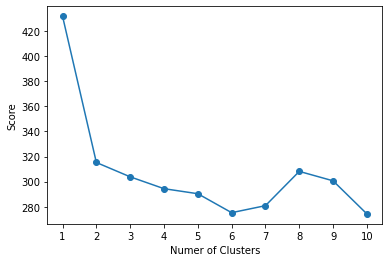

In [52]:
find_comp(A_x, n_range)

gmm_A optimize with 6 components

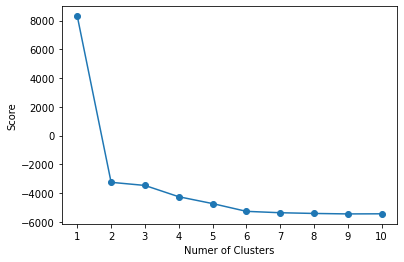

In [53]:
find_comp(B_x, n_range)

gmm_B optimize with 7 components

In [54]:
gmm_A = GaussianMixture(n_components=6)
gmm_B = GaussianMixture(n_components=7)
gmm_A.fit(A_x)
gmm_B.fit(B_x)

GaussianMixture(n_components=7)

In order to assess the labels of the category U files with the GMM models built above, we will use the two models to predict the U1 and U2 peaks separately, and then calculate the log-likelihood of the files under each model.

In [55]:
#U1 on gmm_A
U1_gmmA = gmm_A.predict(peaksU1)
gmm_A.score(peaksU1)

-3.9115707746948973

In [56]:
#U1 on gmm_B
U1_gmmB = gmm_B.predict(peaksU1)
gmm_B.score(peaksU1)

-286.7331506402746

U1 peaks get higher log-likelihood score from gmm_A, therefore U1 belongs to category A

In [57]:
#U2 on gmm_A
U2_gmmA = gmm_A.predict(peaksU2)
gmm_A.score(peaksU2)

-4.99013805797296

In [58]:
#U2 on gmm_B
U2_gmmB = gmm_B.predict(peaksU2)
gmm_B.score(peaksU2)

-248.06990402694706

U2 peaks also get higher log-likelihood score from gmm_A, therefore U2 also belongs to category A

4. Use the periodogram data to make predictions for U this time using PCA. From PCA take the 2 largest axis of variance and then project each training data point on that space with different colored markers. Then project the 2 data from the U files on that space to provide a conclusion for the labels of U files.

In [62]:
from sklearn.decomposition import PCA

In [87]:
pca = PCA(n_components=2)
peaks_x = pd.concat([A_x, B_x], ignore_index=True, axis=0)
peaks_y = pd.concat([A_y, B_y], ignore_index=True, axis=0)
pca.fit(peaks_x)
peaks_pca = pca.fit_transform(peaks_x)

Create a dataframe that projects the peaks data onto the 2-principal-component-space

In [77]:
Peaks_df = pd.DataFrame(data=peaks_pca, columns = ['pc1', 'pc2'])

In [81]:
Peaks_df

,pc1,pc2
0,1.251804,0.372794
1,0.258618,-0.092705
2,1.310330,1.218651
3,0.981817,1.100490
4,-0.580981,0.381631
...,...,...
1539,1.061702,-1.252423
1540,1.059825,-1.250449
1541,1.059052,-1.249753
1542,1.057568,-1.248303


plot the data along the principal component 1 and 2 axis

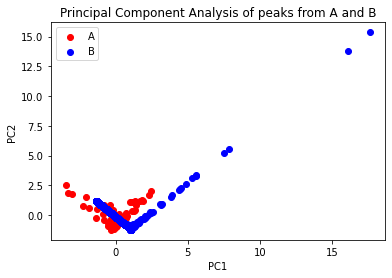

In [84]:
labels = ['A', 'B']
colors = ['red', 'blue']
plt.figure()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis of peaks from A and B')
for label, color in zip(labels, colors):
    ind = Peaks['label'] == label
    plt.scatter(Peaks_df.loc[ind, 'pc1'], Peaks_df.loc[ind, 'pc2'], c = color)
plt.legend(labels)

With the eigendecomposition, project U1 and U2 to the principal component space

In [85]:
U1_proj = pca.transform(peaksU1)
U2_proj = pca.transform(peaksU2)

Plot the U1 and U2 projected data points

Text(0.5, 1.0, 'PCA Projection of U1')

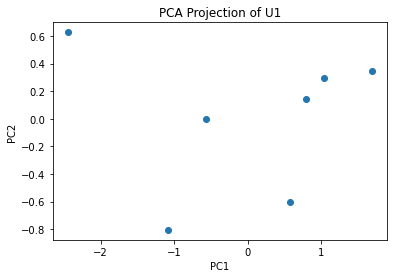

In [95]:
plt.scatter(U1_proj[:,0], U1_proj[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection of U1')


Text(0.5, 1.0, 'PCA Projection of U2')

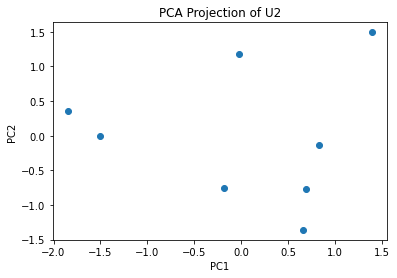

In [96]:
plt.scatter(U2_proj[:,0], U2_proj[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection of U2')

From the PCA projection of A and B data points, we can see that category A points mainly distribute in the space (x=[-5,3], y=[-2.5,2.5]), while category B points mainly distributed in the space of much bigger x and y range. Comparing the U1 and U2 data points distribution to the data points from category A and B, both U1 and U2 are more likely to belong to category A than B. But since the data points from A and B are not distinctly separated, it is still difficult to tell. Therefore I attempt to fit a classifer on the PCA-transformed data to further confirm

In [97]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(Peaks_df, peaks_y)
U1_labels = classifier.predict(U1_proj)
U2_labels = classifier.predict(U2_proj)
U1_df = pd.DataFrame(data=U1_proj, columns = ['pc1', 'pc2'])
U2_df = pd.DataFrame(data=U2_proj, columns = ['pc1', 'pc2'])

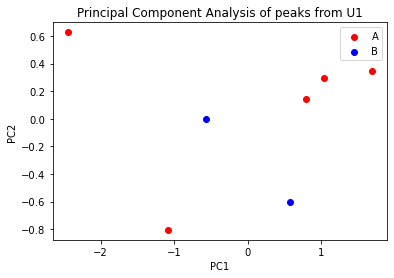

In [99]:
labels = ['A', 'B']
colors = ['red', 'blue']
plt.figure()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis of peaks from U1')
for label, color in zip(labels, colors):
    ind = U1_labels == label
    plt.scatter(U1_df.loc[ind, 'pc1'], U1_df.loc[ind, 'pc2'], c = color)
plt.legend(labels)

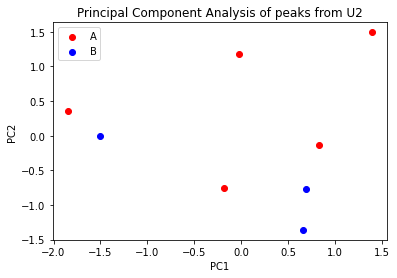

In [100]:
labels = ['A', 'B']
colors = ['red', 'blue']
plt.figure()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis of peaks from U2')
for label, color in zip(labels, colors):
    ind = U2_labels == label
    plt.scatter(U2_df.loc[ind, 'pc1'], U2_df.loc[ind, 'pc2'], c = color)
plt.legend(labels)

From these classification results, we can see that both U1 and U2 have more data points belong to category A, therefore U1 and U2 will be both classified as category A from the PCA results.

5. Apply another approach to compare to make a prediction

I will use random forest to finish this part

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.9967637540453075

The random forest model predict 99.7% accurate on the test data set, proceed to use this model to predict the label of U1 and U2

In [61]:
U1_pred_rf = rf.predict(peaksU1)
U2_pred_rf = rf.predict(peaksU2)
U1_pred_rf, U2_pred_rf

(array(['A', 'B', 'A', 'A', 'A', 'A', 'A'], dtype=object),
 array(['A', 'B', 'A', 'A', 'A', 'A', 'A', 'A'], dtype=object))

The prediction result is the same with the prediction results from other methods, U1 and U2 are both categorized as category A.